In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
from tqdm.notebook import tqdm as tqdm

In [66]:
#Note here that T measures kT/J, and all lattices are square

#Metropolis Algorithm
def iteration(lattice, T, N, dim=2):
    #picking random spin
    loc = np.random.randint(0, high=N, size=dim, dtype=int)
    si = lattice[tuple(loc)]
    sj = []
    
    #finding adjacent spins and storing them
    for i in range(dim):
        obj = np.copy(loc)
        obj[i] = obj[i] - 1
        s1 = lattice[tuple(obj)]
        sj.append(s1)
        obj[i] = (obj[i] + 2) % N
        s2 = lattice[tuple(obj)]
        sj.append(s2)

    #computing Delta E
    del_e = 2*si*np.sum(np.asarray(sj))
    copy = np.copy(lattice)
    if del_e <= 0:
        copy[tuple(loc)] = -copy[tuple(loc)]
        return copy
    
    #Flip weighted by boltzmann factor p(new)/p(old)
    prob = np.exp(-del_e / T)
    p = [prob, 1-prob]
    flip = np.random.choice([1, 0], replace = True, p = p)
    if flip == 1:
        copy[tuple(loc)] = -copy[tuple(loc)]
    return copy

#MCMC
def MCMC(chain_len, T, N, dim=2):
    
    #initializing markov chain
    shape = tuple(N * np.ones(dim, dtype=int))
    lattice = 2*np.random.randint(low=0, high=2, size=shape, dtype=int)-1
    out = [lattice]
    
    #sampling with Metropolis
    for i in tqdm(range(chain_len)):
        chain = iteration(out[i], T, N, dim)
        out.append(chain)
    return out

In [67]:
#Running over T=0.25 to T=3.5 in 0.25 increments -- We expect Tc=02.27 from Lecture
N=20
chain_length = 20000*N
temps = np.linspace(0.25, 3.5, 14, endpoint=True)
runs = []
for i in tqdm(range(len(temps))):
    temp = temps[i]
    run = MCMC(chain_length, temp, N)
    runs.append(run)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

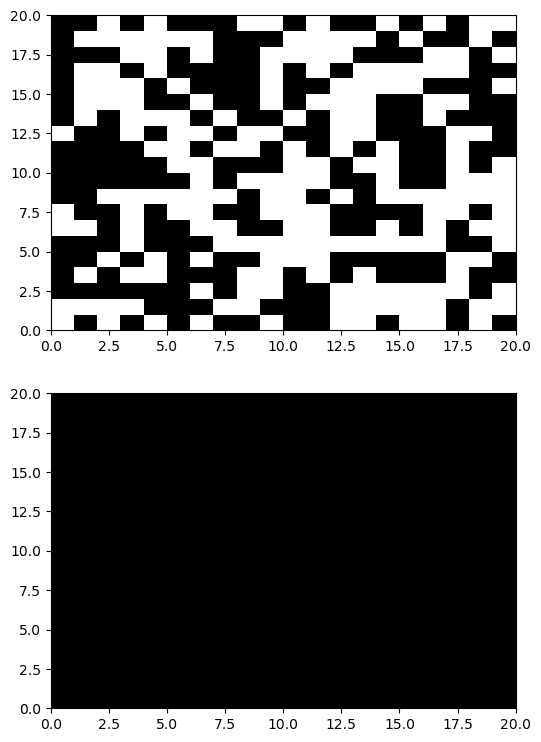

In [65]:
#Visualizing Code
#colors = colors.ListedColormap(['white', 'black'])

x = np.arange(0, N+1, 1)
cmap = colors.ListedColormap(['black', 'white'])
fig, ax = plt.subplots(2, 1, figsize=(6,9))
ax[0].pcolormesh(x, x, run_1[0], cmap=cmap)
ax[1].pcolormesh(x, x, run_1[-1], cmap=cmap)